# Homework 3

As discussed in the class, there has been about $10^{8}$ SN Ia in the Milky Way, for which you can adopt a
total stellar mass of $2\times10^{11}$ solar masses (and assume that 75% of that mass is due to hydrogen).
Use the yields below to compute the mass fraction of O, Mg, Si, S, Ar, Ca, Fe and Ni. For iron, add the
yields from $^{54}$ Fe and $^{56}$ Fe. For the SN II yields, you do not need to use a mass function. Simply adopt as
the representative yields of a SN II, the average yield of the SN based on 13 and 40 solar masses.
Estimate what is the ratio r of the number of SN II to SNIa, that best reproduce the solar mass fractions
of the above elements. Make a plot, showing in the vertical axis the log of the ratio between your
computed mass fractions (for your best value of “r”) and the observed solar mass fractions, meaning,
$\log_{10} (X_i^{computed}/X_i^{Sun})$. In the horizontal axis plot the atomic number.

1) What r gives the best overall fit?
2) What r is required to reproduce the observed iron mass ratio in the Sun?
3) What r is required to reproduce the observed oxygen mass ratio in the Sun?

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Definindo parâmetros
m_mw=2*(10**11)
n_snI=10**8
fator_hidrogenio=1

In [96]:
#Definindo yields
yields=pd.read_csv('yields.csv')
yields['snII']=(yields['snIIm13']+yields['snIIm40'])/2
yields=yields.drop(['snIIm13', 'snIIm40'],axis='columns')

frac_snI=yields['snI']/(m_mw*fator_hidrogenio)
frac_snII=yields['snII']/(m_mw*fator_hidrogenio)

In [97]:
#Definindo abundâncias solares
solar=pd.read_csv('solar_abundances.csv', header=3)
z = solar['Z']
eps = solar['A_Sun']
eps_he = eps[1] # Abundância de He
n_he_h = 1e-12 * 10**eps[1] # n_He/n_H
atomic_wt = solar['atomic_wt']
sum = 0
for i in range(2, len(eps), 1): sum += atomic_wt[i] * 1e-12 * 10**eps[i]
denom = 1 + 4*(n_he_h) + sum # Denominador de ambas as equações

n_x_h = 1e-12 * 10**eps
a_x_h= atomic_wt
f_x= (a_x_h*n_x_h)/denom
solar['frac']=f_x
solar=solar.loc[[7,11,13,15,17,19,25,27]]
solar.index=np.arange(0,8,1) 

Melhor razão de supernovas baseados na soma de erros:2.519
Erro mínimo:0.00158


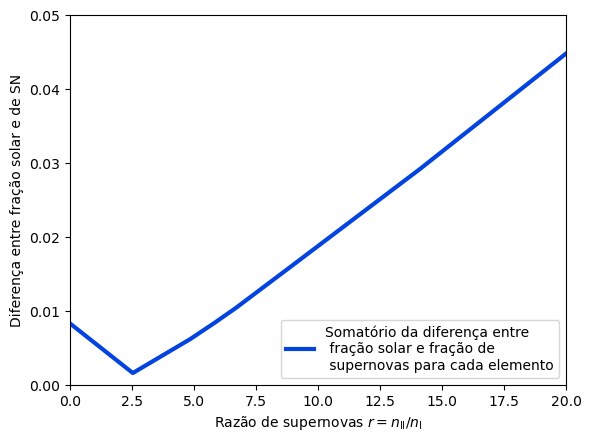

In [98]:
#Achando o melhor R possível
ratios=np.arange(0.001, 30, 0.001)
erros=[]
flag=1
for r in ratios:
    n_snII=r*n_snI
    total= n_snII*frac_snII + n_snI*frac_snI
    diferenca= total - np.array(solar['frac'])
    erros.append(np.sum(np.abs(diferenca)))

plt.plot(ratios, erros, color='xkcd:blue', linewidth=3, label='Somatório da diferença entre\n fração solar e fração de\n supernovas para cada elemento')
plt.xlim([0,20])
plt.ylim([0, 0.05])
plt.xlabel(r'Razão de supernovas $r=n_\text{II}/n_\text{I}$')
plt.ylabel(r'Diferença entre fração solar e de SN')
plt.legend(loc='lower right')

index_erro_min=erros.index(min(erros))
index_min=np.argmin(erros)
best=ratios[index_min]
print(r"Melhor razão de supernovas baseados na soma de erros:{:.3f}".format(ratios[index_erro_min]))
print(r"Erro mínimo:{:.5f}".format(min(erros)))

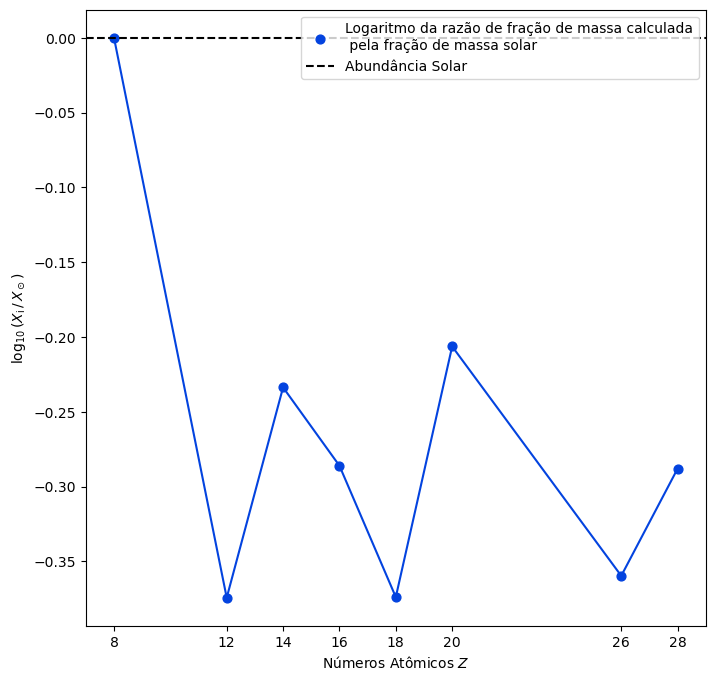

In [99]:
#Plotando o gráfico solicitado
total=frac_snI*n_snI + frac_snII*n_snI*best
frac_solares=np.array(solar['frac'])
n_atomico=np.array(solar['Z'])

g2=plt.figure(figsize=[8,8])
plt.scatter(n_atomico, np.log10(total/frac_solares), s=40, c='xkcd:blue', label="Logaritmo da razão de fração de massa calculada\n pela fração de massa solar" )
plt.plot(n_atomico, np.log10(total/frac_solares), c='xkcd:blue' )
plt.axhline(0, ls='--', color='xkcd:black', label="Abundância Solar")
plt.xticks([8,12,14,16,18,20,26,28])
plt.xlabel(r"Números Atômicos $Z$")
plt.ylabel(r"$\log_{10}{(X_{\text{i}}\,/\,X_\odot)}$")
plt.legend()

In [105]:
#Determinando o melhor r para cada elemento

n_snII=(1/frac_snII)*(solar['frac']-n_snI*frac_snI)
yields['n_snII']=n_snII
yields['r']=n_snII/n_snI
print(yields)
print(r"Melhor razão de supernovas para o Oxigênio:{:.3f}".format(yields['r'][0]))
print(r"Melhor razão de supernovas para o Ferro:{:.3f}".format(yields['r'][6]))

    Z   snI    snII        n_snII          r
0   8  0.00  4.6300  2.518658e+08   2.518658
1  12  0.09  0.1795  6.648141e+08   6.648141
2  14  0.16  0.2500  4.769893e+08   4.769893
3  16  0.08  0.0975  5.631172e+08   5.631172
4  18  0.02  0.0160  7.662952e+08   7.662952
5  20  0.04  0.0135  5.851966e+08   5.851966
6  26  0.75  0.1180  1.395589e+09  13.955887
7  28  0.06  0.0045  1.742928e+09  17.429284
Melhor razão de supernovas para o Oxigênio:2.519
Melhor razão de supernovas para o Ferro:13.956
